In [56]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from glob import glob

from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [57]:
normal_y, normal_sr = librosa.load('-6db_fan/fan/id_00/normal/00000000.wav')

In [58]:
abnormal_y, abnormal_sr = librosa.load('-6db_fan/fan/id_00/abnormal/00000000.wav')

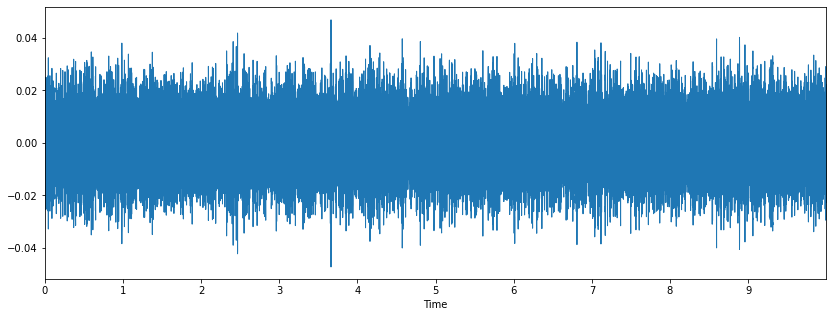

In [59]:
audio_path = '-6db_fan/fan/id_00/normal/00000000.wav'
normal_y, normal_sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(normal_y, sr=normal_sr)

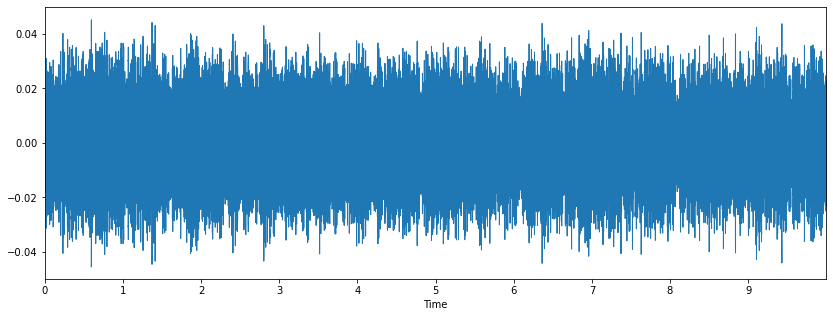

In [60]:
audio_path = '-6db_fan/fan/id_00/abnormal/00000000.wav'
abnormal_y, abnormal_sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(abnormal_y, sr=abnormal_sr)

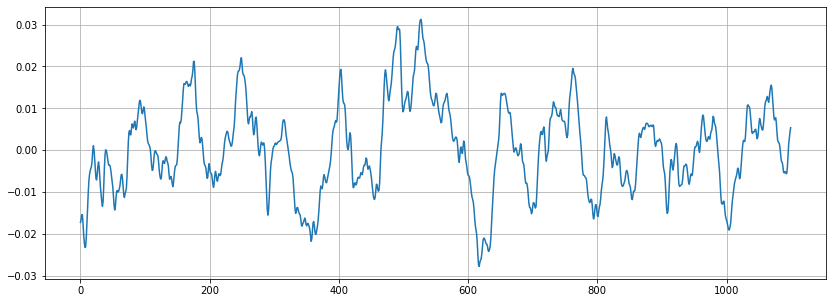

In [61]:
n0 = 8000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(normal_y[n0:n1])
plt.grid()

220500

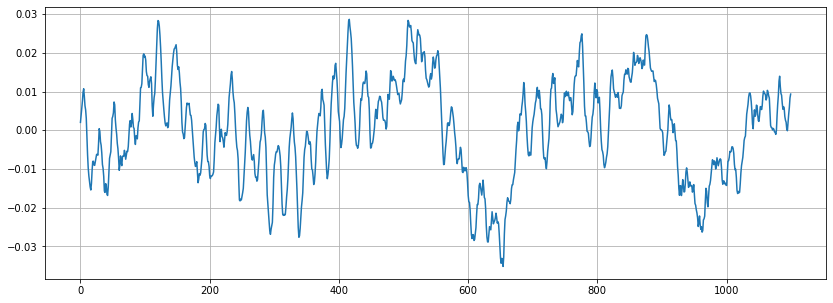

In [62]:
n0 = 8000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(abnormal_y[n0:n1])
plt.grid()
len(abnormal_y)

In [63]:
y = [*normal_y,*abnormal_y]
df = pd.DataFrame(y,columns=['amplitude'])

df['zero_crossings'] = [0]*len(y)
df['rms'] =  [0]*len(y)
df['spectral_bandwidth'] = [0] * len(y)

In [64]:


zero_crossings_normal = float(sum(librosa.feature.zero_crossing_rate(normal_y).T))
zero_crossings_abnormal = float(sum(librosa.feature.zero_crossing_rate(abnormal_y).T))


df.loc[:(len(y)/2)-1,'zero_crossings']= zero_crossings_normal
df.loc[len(y)/2:len(y)-1,'zero_crossings']= zero_crossings_abnormal
df



,amplitude,zero_crossings,rms,spectral_bandwidth
0,-0.014585,18.046387,0,0
1,-0.017370,18.046387,0,0
2,-0.015581,18.046387,0,0
3,-0.016613,18.046387,0,0
4,-0.016445,18.046387,0,0
...,...,...,...,...
440995,0.014003,23.267090,0,0
440996,0.011594,23.267090,0,0
440997,0.011231,23.267090,0,0
440998,0.013799,23.267090,0,0


In [65]:
rms_normal = float(sum(librosa.feature.rms(y=normal_y).T))
rms_abnormal = float(sum(librosa.feature.rms(y=abnormal_y).T))


df.loc[:(len(y)/2)-1,'rms']= rms_normal
df.loc[len(y)/2:len(y)-1,'rms']= rms_abnormal
df


,amplitude,zero_crossings,rms,spectral_bandwidth
0,-0.014585,18.046387,4.419113,0
1,-0.017370,18.046387,4.419113,0
2,-0.015581,18.046387,4.419113,0
3,-0.016613,18.046387,4.419113,0
4,-0.016445,18.046387,4.419113,0
...,...,...,...,...
440995,0.014003,23.267090,5.088128,0
440996,0.011594,23.267090,5.088128,0
440997,0.011231,23.267090,5.088128,0
440998,0.013799,23.267090,5.088128,0


In [66]:
spectral_bandwidth_normal = float(sum(librosa.feature.spectral_bandwidth(normal_y).T))
spectral_bandwidth_abnormal = float(sum(librosa.feature.spectral_bandwidth(abnormal_y).T))

df.loc[:(len(y)/2)-1,'spectral_bandwidth']= rms_normal
df.loc[len(y)/2:len(y)-1,'spectral_bandwidth']= rms_abnormal
df

,amplitude,zero_crossings,rms,spectral_bandwidth
0,-0.014585,18.046387,4.419113,4.419113
1,-0.017370,18.046387,4.419113,4.419113
2,-0.015581,18.046387,4.419113,4.419113
3,-0.016613,18.046387,4.419113,4.419113
4,-0.016445,18.046387,4.419113,4.419113
...,...,...,...,...
440995,0.014003,23.267090,5.088128,5.088128
440996,0.011594,23.267090,5.088128,5.088128
440997,0.011231,23.267090,5.088128,5.088128
440998,0.013799,23.267090,5.088128,5.088128


In [67]:
df['target'] = [0]*len(y)
df.loc[:(len(y)/2)-1,'target']=0
df.loc[len(y)/2:len(y)-1,'target']=1

In [68]:
df

,amplitude,zero_crossings,rms,spectral_bandwidth,target
0,-0.014585,18.046387,4.419113,4.419113,0
1,-0.017370,18.046387,4.419113,4.419113,0
2,-0.015581,18.046387,4.419113,4.419113,0
3,-0.016613,18.046387,4.419113,4.419113,0
4,-0.016445,18.046387,4.419113,4.419113,0
...,...,...,...,...,...
440995,0.014003,23.267090,5.088128,5.088128,1
440996,0.011594,23.267090,5.088128,5.088128,1
440997,0.011231,23.267090,5.088128,5.088128,1
440998,0.013799,23.267090,5.088128,5.088128,1


In [80]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1].values, df.iloc[:,-1].values, test_size=0.3, random_state=42)

In [81]:
pipeline_lr = Pipeline([('scalar1',StandardScaler()),
                        ('lr_classifier',LogisticRegression(random_state=0))])

In [82]:
pipeline_rf = Pipeline([('scalar2',StandardScaler()),
                        ('rf_classifier',RandomForestClassifier(n_estimators=int((len(df.columns)**0.5//1)), criterion= 'entropy',random_state=0))])

In [83]:
pipeline_dt = Pipeline([('scalar3',StandardScaler()),
                        ('dt_classifier',DecisionTreeClassifier(criterion="entropy",random_state=0))])


In [84]:
pipeline_GaussianNB = Pipeline([('scalar4',StandardScaler()),
                        ('dt_classifier',GaussianNB())])

In [85]:
pipelines = [pipeline_lr,pipeline_rf,pipeline_dt,pipeline_GaussianNB]

In [86]:
best_accuracy=0.0
best_classifier_indx = 0
best_pipeline=""

In [87]:
pipe_dict = {0:'Logistic Regression',1:'Random Forest',2:'Decision Tree',3:'GaussianNB'}

In [88]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [91]:
for i,model in enumerate(pipelines):
    print(f"{pipe_dict[i]} test accuracy: {model.score(X_test,y_test)} ")
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=  model.score(X_test,y_test)
        best_pipeline=model
        best_classifier_idnx = i
print(f"Classifier with the best accuracy:{pipe_dict[best_classifier_idnx]}")

Logistic Regression test accuracy: 1.0 
Random Forest test accuracy: 1.0 
Decision Tree test accuracy: 1.0 
GaussianNB test accuracy: 1.0 
Classifier with the best accuracy:Logistic Regression
